In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/no_nan_qna_set.csv', index_col=0)
# df = pd.read_table('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/moonee_qna_set.txt', sep=',', index_col=0)
# df.head()

In [ ]:
sub_type_mapping = {
    '내비게이션': 0,
    '타이어': 1,
    '라이트': 2,
    '시동': 3,
    '경고등': 4,
    '차량외부': 5,
    '차량내부': 6,
    '주행관련': 7,
    '사고조사': 8,
    '단말기': 9,
    '주유/충전카드': 10,
    '후방카메라': 11,
    '하이패스': 12,
    '차량점검': 13,
    '브레이크': 14,
    '블랙박스': 15,
    '위생문제': 16,
    '주차장': 17,
    'ADAS': 18,
    '비치품': 19,
    '충전기확인': 20
}

func = lambda x: sub_type_mapping.get(x, x)

In [ ]:
df['sub_type'] = df['sub_type'].map(func)

In [ ]:
from sklearn.model_selection import train_test_split

# train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True, random_state=930)

In [ ]:
# drop=True 안 하면 index 열 안 사라짐
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [ ]:
train_data.sub_type.nunique(), test_data.sub_type.nunique()

(21, 21)

In [ ]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 개수 출력
print('테스트용 리뷰 개수 :',len(test_data)) # 테스트 개수 출력

훈련용 리뷰 개수 : 4668
테스트용 리뷰 개수 : 1168


In [ ]:
# train_data[:5] # 상위 5개 출력

In [ ]:
# test_data[:5]

In [ ]:
train_data['inquiry'].nunique(), train_data['sub_type'].nunique()

(3922, 21)

In [ ]:
### 일부러 스킵
# train_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

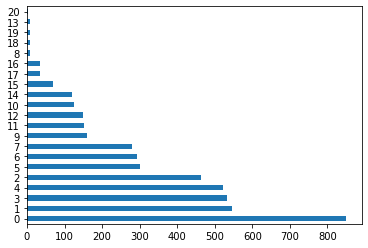

In [ ]:
train_data['sub_type'].value_counts().plot(kind = 'barh')

In [ ]:
print(train_data.groupby('sub_type').size().reset_index(name = 'count'))

    sub_type  count
0          0    849
1          1    545
2          2    464
3          3    532
4          4    521
5          5    300
6          6    293
7          7    280
8          8      9
9          9    160
10        10    125
11        11    153
12        12    150
13        13      8
14        14    121
15        15     70
16        16     34
17        17     36
18        18      8
19        19      8
20        20      2


In [ ]:
print(test_data.groupby('sub_type').size().reset_index(name = 'count'))

    sub_type  count
0          0    209
1          1    130
2          2    119
3          3    140
4          4    121
5          5     89
6          6     75
7          7     68
8          8      2
9          9     20
10        10     33
11        11     37
12        12     49
13        13      5
14        14     21
15        15     20
16        16     12
17        17     12
18        18      2
19        19      2
20        20      2


In [ ]:
print(train_data.isnull().values.any())

False


## 토크나이저를 이용한 정수 인코딩

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import transformers

transformers.__version__

'4.19.2'

In [ ]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained("klue/bert-base")

In [ ]:
test_data = test_data.dropna(how='any')

In [ ]:
print(len(test_data))

1168


In [ ]:
X_train_list = train_data['inquiry'].tolist()
X_test_list = test_data['inquiry'].tolist()
y_train = train_data['sub_type'].tolist()
y_test = test_data['sub_type'].tolist()

In [ ]:
X_train = tokenizer(X_train_list, truncation=True, padding=True)
X_test = tokenizer(X_test_list, truncation=True, padding=True)

In [ ]:
# print(X_train[0].tokens)

In [ ]:
print(X_train[0].ids)

[2, 9926, 4318, 3915, 6233, 1506, 2372, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(X_train[0].type_ids)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


type_ids는 지금 풀고자 하는 문제에서 문장의 종류의 개수를 의미하는데, 일반적으로 두 개 이상의 문장을 가지고 푸는 문제일 경우에는 [0, 0, 0, 0, 1, 1, 1, 1] 이런 식의 값이 들어가지만 네이버 영화 리뷰는 문장 1개를 보고 푸는 문제라서 [0, 0, 0, 0, 0, 0, 0, 0]이 들어간다.

In [ ]:
print(X_train[0].attention_mask)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 데이터셋 생성 및 모델 학습

In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train),
    y_train
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test),
    y_test
))

In [ ]:
from transformers import TFBertForSequenceClassification
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [ ]:
# loss = model.compute_loss
# loss = tf.keras.losses.CategoricalCrossentropy()

### 여기서, Kobert 시도

In [ ]:
pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-y4ilwx0c
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-y4ilwx0c
     |████████████████████████████████| 132 kB 4.3 MB/s 
     |████████████████████████████████| 344 kB 34.6 MB/s 
     |████████████████████████████████| 49.1 MB 97.2 MB/s 
     |████████████████████████████████| 4.5 MB 76.5 MB/s 
     |████████████████████████████████| 1.2 MB 52.9 MB/s 
     |████████████████████████████████| 79 kB 7.8 MB/s 
     |████████████████████████████████| 8.8 MB 58.9 MB/s 
     |████████████████████████████████| 127 kB 79.5 MB/s 
  Created wheel for kobert: filename=kobert-0.2.3-py3-none-any.whl size=15674 sha256=7ed9bbd73257ede7027f6e952be2d28c5087e601e855ef7b2f65d3eab7c9ab1c
  Stored in directory: /tmp/pip-ephem-wheel-cache-9iw9p6fj/wheels/d3/68/ca/334

In [ ]:
!git clone https://github.com/SKTBrain/KoBERT.git
!cd KoBERT
!pip install -r requirements.txt

Cloning into 'KoBERT'...
remote: Enumerating objects: 425, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 425 (delta 128), reused 106 (delta 106), pack-reused 275
Receiving objects: 100% (425/425), 219.30 KiB | 1.54 MiB/s, done.
Resolving deltas: 100% (219/219), done.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
import torch
from kobert import get_pytorch_kobert_model

input_ids = torch.LongTensor([[31, 51, 99], [15, 5, 0]])
input_mask = torch.LongTensor([[1, 1, 1], [1, 1, 0]])
token_type_ids = torch.LongTensor([[0, 0, 1], [0, 1, 0]])
model, vocab  = get_pytorch_kobert_model()

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [ ]:
# from_pt=True: 파이토치에서 학습된 모델인데 tf에서 쓰게 하기 위해
model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=21, from_pt=True)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

AttributeError: ignored

In [ ]:
a = {}
a['안녕'] = list(1)
print(a)

TypeError: ignored

In [ ]:
a['안녕'].append(str(2))

In [ ]:
a = print('안녕')

안녕


In [ ]:
a

In [ ]:
a['c'] = '123'
a['b'] = '4565'
a['a'] = '5222'
print(a)

{'a': '5222', 'b': '4565', 'c': '123'}


In [ ]:
a = ['1','2','3','4','5','6','7']
' '.join(a)

'1 2 3 4 5 6 7'

In [ ]:
a = {'b': '4565', 'c': '123', 'a': '454'}
print(a)

{'b': '4565', 'c': '123', 'a': '454'}


In [ ]:
a.keys()

dict_keys(['a', 'b', 'c'])

In [ ]:
a.items()

dict_items([('a', '123'), ('b', '4565'), ('c', '5222')])

In [ ]:
sorted(a.items())

[('a', '454'), ('b', '4565'), ('c', '123')]

In [ ]:
# model.compute_loss

In [ ]:
callback_earlystop = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=2)

model.fit(
    train_dataset.shuffle(10000).batch(32), epochs=5, batch_size=64,
    validation_data = val_dataset.shuffle(10000).batch(64),
    callbacks = [callback_earlystop]
)

Epoch 1/5
146/146 [==============================] - 213s 1s/step - loss: 4.6326 - accuracy: 0.1553 - val_loss: 3.5429 - val_accuracy: 0.2260
Epoch 2/5
146/146 [==============================] - 194s 1s/step - loss: 3.3767 - accuracy: 0.1397 - val_loss: 3.0445 - val_accuracy: 0.1199
Epoch 3/5
146/146 [==============================] - 192s 1s/step - loss: 3.0445 - accuracy: 0.0812 - val_loss: 3.0445 - val_accuracy: 0.1199


In [ ]:
model.evaluate(val_dataset.batch(1024))

2/2 [==============================] - 8s 991ms/step - loss: 3.0445 - accuracy: 0.1199


[3.044522523880005, 0.11986301094293594]

### **모델 저장**

In [ ]:
model_path = '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/kobert-base'

model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base/tokenizer_config.json',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base/special_tokens_map.json',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base/vocab.txt',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base/added_tokens.json',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base/tokenizer.json')

### **모델 로드 및 테스트**

In [ ]:
from transformers import TextClassificationPipeline

# 로드하기
loaded_tokenizer = BertTokenizerFast.from_pretrained(model_path)
loaded_model = TFBertForSequenceClassification.from_pretrained(model_path)

text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=loaded_model, 
    framework='tf',
    return_all_scores=True
)

Some layers from the model checkpoint at /content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequen

In [ ]:
# test_data

In [ ]:
text_classifier('네비게이션이 안 돼요.')[0]

[{'label': 'LABEL_0', 'score': 0.06171053275465965},
 {'label': 'LABEL_1', 'score': 0.06369717419147491},
 {'label': 'LABEL_2', 'score': 0.0514572337269783},
 {'label': 'LABEL_3', 'score': 0.06769560277462006},
 {'label': 'LABEL_4', 'score': 0.008780881762504578},
 {'label': 'LABEL_5', 'score': 0.04456759989261627},
 {'label': 'LABEL_6', 'score': 0.04832565039396286},
 {'label': 'LABEL_7', 'score': 0.05187350884079933},
 {'label': 'LABEL_8', 'score': 0.022244412451982498},
 {'label': 'LABEL_9', 'score': 0.04364839941263199},
 {'label': 'LABEL_10', 'score': 0.0466545894742012},
 {'label': 'LABEL_11', 'score': 0.060207586735486984},
 {'label': 'LABEL_12', 'score': 0.03719550371170044},
 {'label': 'LABEL_13', 'score': 0.039285093545913696},
 {'label': 'LABEL_14', 'score': 0.06385909765958786},
 {'label': 'LABEL_15', 'score': 0.03941388428211212},
 {'label': 'LABEL_16', 'score': 0.048136156052351},
 {'label': 'LABEL_17', 'score': 0.04152601584792137},
 {'label': 'LABEL_18', 'score': 0.0428

In [ ]:
for i in text_classifier('네비게이션이 안 돼요.')[0][0].values():
  print(i)

LABEL_0
0.06171053275465965


In [ ]:
for label in text_classifier('네비게이션이 안 돼요.')[0]:
    # print(label)
    # print(label.values())
    print(list(label.values())[0])
    # print(list(label.values())[0][-1])

LABEL_0
LABEL_1
LABEL_2
LABEL_3
LABEL_4
LABEL_5
LABEL_6
LABEL_7
LABEL_8
LABEL_9
LABEL_10
LABEL_11
LABEL_12
LABEL_13
LABEL_14
LABEL_15
LABEL_16
LABEL_17
LABEL_18
LABEL_19
LABEL_20


In [ ]:
sub_type_mapping = {
    'LABEL_0' : '내비게이션',
    'LABEL_1' : '타이어',
    'LABEL_2' : '라이트',
    'LABEL_3' : '시동',
    'LABEL_4' : '경고등',
    'LABEL_5' : '차량외부',
    'LABEL_6' : '차량내부',
    'LABEL_7' : '주행관련',
    'LABEL_8' : '사고조사',
    'LABEL_9' : '단말기',
    'LABEL_10' : '주유/충전카드',
    'LABEL_11' : '후방카메라',
    'LABEL_12' : '하이패스',
    'LABEL_13' : '차량점검',
    'LABEL_14' : '브레이크',
    'LABEL_15' : '블랙박스',
    'LABEL_16' : '위생문제',
    'LABEL_17' : '주차장',
    'LABEL_18' : 'ADAS',
    'LABEL_19' : '비치품',
    'LABEL_20' : '충전기확인'
}

In [ ]:
for label in text_classifier('네비게이션이 안 돼요.')[0]:
    print(sub_type_mapping.get(list(label.values())[0]))

내비게이션
타이어
라이트
시동
경고등
차량외부
차량내부
주행관련
사고조사
단말기
주유/충전카드
후방카메라
하이패스
차량점검
브레이크
블랙박스
위생문제
주차장
ADAS
비치품
충전기확인


In [ ]:
text_classifier('네비게이션이 안 돼요.')[0]

[{'label': 'LABEL_0', 'score': 0.06171053275465965},
 {'label': 'LABEL_1', 'score': 0.06369717419147491},
 {'label': 'LABEL_2', 'score': 0.0514572337269783},
 {'label': 'LABEL_3', 'score': 0.06769560277462006},
 {'label': 'LABEL_4', 'score': 0.008780881762504578},
 {'label': 'LABEL_5', 'score': 0.04456759989261627},
 {'label': 'LABEL_6', 'score': 0.04832565039396286},
 {'label': 'LABEL_7', 'score': 0.05187350884079933},
 {'label': 'LABEL_8', 'score': 0.022244412451982498},
 {'label': 'LABEL_9', 'score': 0.04364839941263199},
 {'label': 'LABEL_10', 'score': 0.0466545894742012},
 {'label': 'LABEL_11', 'score': 0.060207586735486984},
 {'label': 'LABEL_12', 'score': 0.03719550371170044},
 {'label': 'LABEL_13', 'score': 0.039285093545913696},
 {'label': 'LABEL_14', 'score': 0.06385909765958786},
 {'label': 'LABEL_15', 'score': 0.03941388428211212},
 {'label': 'LABEL_16', 'score': 0.048136156052351},
 {'label': 'LABEL_17', 'score': 0.04152601584792137},
 {'label': 'LABEL_18', 'score': 0.0428

In [ ]:
text_classifier('타이어가 펑크났어요.')[0]

[{'label': 'LABEL_0', 'score': 0.060794249176979065},
 {'label': 'LABEL_1', 'score': 0.06475633382797241},
 {'label': 'LABEL_2', 'score': 0.052369583398103714},
 {'label': 'LABEL_3', 'score': 0.06639556586742401},
 {'label': 'LABEL_4', 'score': 0.008674426935613155},
 {'label': 'LABEL_5', 'score': 0.04401979595422745},
 {'label': 'LABEL_6', 'score': 0.04895246773958206},
 {'label': 'LABEL_7', 'score': 0.05347326770424843},
 {'label': 'LABEL_8', 'score': 0.02234588749706745},
 {'label': 'LABEL_9', 'score': 0.04383241757750511},
 {'label': 'LABEL_10', 'score': 0.047474492341279984},
 {'label': 'LABEL_11', 'score': 0.05968937650322914},
 {'label': 'LABEL_12', 'score': 0.03812386840581894},
 {'label': 'LABEL_13', 'score': 0.03932369872927666},
 {'label': 'LABEL_14', 'score': 0.06285566836595535},
 {'label': 'LABEL_15', 'score': 0.039522211998701096},
 {'label': 'LABEL_16', 'score': 0.04770611226558685},
 {'label': 'LABEL_17', 'score': 0.041328009217977524},
 {'label': 'LABEL_18', 'score': 

In [ ]:
text_classifier('주차 딱지가 붙었는데 어떡하죠?')[0] # 비치품

[{'label': 'LABEL_0', 'score': 0.060215599834918976},
 {'label': 'LABEL_1', 'score': 0.06463143974542618},
 {'label': 'LABEL_2', 'score': 0.05243275314569473},
 {'label': 'LABEL_3', 'score': 0.06741102039813995},
 {'label': 'LABEL_4', 'score': 0.008767984807491302},
 {'label': 'LABEL_5', 'score': 0.04413130134344101},
 {'label': 'LABEL_6', 'score': 0.04939824342727661},
 {'label': 'LABEL_7', 'score': 0.05407079681754112},
 {'label': 'LABEL_8', 'score': 0.022228891029953957},
 {'label': 'LABEL_9', 'score': 0.042986489832401276},
 {'label': 'LABEL_10', 'score': 0.047486335039138794},
 {'label': 'LABEL_11', 'score': 0.06060115247964859},
 {'label': 'LABEL_12', 'score': 0.03770942613482475},
 {'label': 'LABEL_13', 'score': 0.03944791480898857},
 {'label': 'LABEL_14', 'score': 0.06211699917912483},
 {'label': 'LABEL_15', 'score': 0.03939196094870567},
 {'label': 'LABEL_16', 'score': 0.047223933041095734},
 {'label': 'LABEL_17', 'score': 0.04126367345452309},
 {'label': 'LABEL_18', 'score': 

In [ ]:
text_classifier('자동차 전기 충전이 안 돼요 ㅠㅠ')[0]

[{'label': 'LABEL_0', 'score': 0.05967015027999878},
 {'label': 'LABEL_1', 'score': 0.06599448621273041},
 {'label': 'LABEL_2', 'score': 0.0514165535569191},
 {'label': 'LABEL_3', 'score': 0.06954026967287064},
 {'label': 'LABEL_4', 'score': 0.008748231455683708},
 {'label': 'LABEL_5', 'score': 0.045845165848731995},
 {'label': 'LABEL_6', 'score': 0.04874897003173828},
 {'label': 'LABEL_7', 'score': 0.05185564234852791},
 {'label': 'LABEL_8', 'score': 0.02184639684855938},
 {'label': 'LABEL_9', 'score': 0.04367055743932724},
 {'label': 'LABEL_10', 'score': 0.04602168872952461},
 {'label': 'LABEL_11', 'score': 0.060042355209589005},
 {'label': 'LABEL_12', 'score': 0.03593416139483452},
 {'label': 'LABEL_13', 'score': 0.03945130482316017},
 {'label': 'LABEL_14', 'score': 0.06332334131002426},
 {'label': 'LABEL_15', 'score': 0.03992675617337227},
 {'label': 'LABEL_16', 'score': 0.04773835092782974},
 {'label': 'LABEL_17', 'score': 0.04125790297985077},
 {'label': 'LABEL_18', 'score': 0.04

In [ ]:
text_classifier('충전기 ')[0]

[{'label': 'LABEL_0', 'score': 0.06265881657600403},
 {'label': 'LABEL_1', 'score': 0.0625363439321518},
 {'label': 'LABEL_2', 'score': 0.05168551951646805},
 {'label': 'LABEL_3', 'score': 0.0675610899925232},
 {'label': 'LABEL_4', 'score': 0.008939415216445923},
 {'label': 'LABEL_5', 'score': 0.04470821097493172},
 {'label': 'LABEL_6', 'score': 0.04817643389105797},
 {'label': 'LABEL_7', 'score': 0.053522832691669464},
 {'label': 'LABEL_8', 'score': 0.022698596119880676},
 {'label': 'LABEL_9', 'score': 0.04374077543616295},
 {'label': 'LABEL_10', 'score': 0.04654713720083237},
 {'label': 'LABEL_11', 'score': 0.060254618525505066},
 {'label': 'LABEL_12', 'score': 0.03856554999947548},
 {'label': 'LABEL_13', 'score': 0.03931126743555069},
 {'label': 'LABEL_14', 'score': 0.06351201981306076},
 {'label': 'LABEL_15', 'score': 0.038848280906677246},
 {'label': 'LABEL_16', 'score': 0.047640200704336166},
 {'label': 'LABEL_17', 'score': 0.040885116904973984},
 {'label': 'LABEL_18', 'score': 0

In [ ]:
text_classifier('라이트가 안들어와요')[0]

[{'label': 'LABEL_0', 'score': 0.061469607055187225},
 {'label': 'LABEL_1', 'score': 0.06413542479276657},
 {'label': 'LABEL_2', 'score': 0.05291236564517021},
 {'label': 'LABEL_3', 'score': 0.06676836311817169},
 {'label': 'LABEL_4', 'score': 0.008888648822903633},
 {'label': 'LABEL_5', 'score': 0.04428824037313461},
 {'label': 'LABEL_6', 'score': 0.04980771988630295},
 {'label': 'LABEL_7', 'score': 0.053294505923986435},
 {'label': 'LABEL_8', 'score': 0.02273344248533249},
 {'label': 'LABEL_9', 'score': 0.043180279433727264},
 {'label': 'LABEL_10', 'score': 0.04689652845263481},
 {'label': 'LABEL_11', 'score': 0.06082809716463089},
 {'label': 'LABEL_12', 'score': 0.037426553666591644},
 {'label': 'LABEL_13', 'score': 0.03923298045992851},
 {'label': 'LABEL_14', 'score': 0.062499724328517914},
 {'label': 'LABEL_15', 'score': 0.03898065537214279},
 {'label': 'LABEL_16', 'score': 0.04693499207496643},
 {'label': 'LABEL_17', 'score': 0.04105991870164871},
 {'label': 'LABEL_18', 'score': 